# Task 4.10 Part C Coding Etiquette and Excel Reporting

Contents

1. Import libraries


2. Import latest data frame


3. Customer Profiling


4. Distribution of Customer Profiles


5. Descriptive stats of Customer Profiles


6. Customer profile by Region 


7. Customer profile by Price Range


8. Customer Profile by Spending Type


9. Customer Profile by Loyalty


# 1. Import libraries

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Import latest dataset Instacart_final
# Turn project folder path into a string

path = r'/Users/giorjeanmutuc/Instacart Basket Analysis'

# 2. Import latest data set

In [4]:
# Import Instacart_final2.pkl

df_final = pd.read_pickle(r'/Users/giorjeanmutuc/Instacart Basket Analysis/02 Data/Prepared Data/Instacart_final2.pkl')

In [9]:
df_final.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,dependents,fam_status,income,_merge,region,exclusion_flag,age_range,income_bracket,parental_status
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,2/17/2019,3,married,40423,both,South,Regular customer,31-40,<50000,Parent
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,both,South,Regular customer,31-40,<50000,Parent
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,both,South,Regular customer,31-40,<50000,Parent
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,both,South,Regular customer,31-40,<50000,Parent
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,both,South,Regular customer,31-40,<50000,Parent


# 3. Customer profiling

In [5]:
# create flag for 'Young parent' age: 21-40, income: <=99999, parental_status: Parent, order_freq_flag: Frequent customer, Regular customer, department_id: 4,16,7,1,13

df_final.loc[(df_final['age_range'].isin(['21-30','31-40'])) & (df_final['income'] <= 99999) & (df_final['parental_status'] == 'Parent') & (df_final['order_freq_flag'].isin(['Frequent customer','Regular customer'])) & (df_final['department_id'].isin([4, 16, 7, 1, 13])), 'customer_profile'] = 'Young parent'

In [6]:
# create flag for 'Old Parent' age: 41-60, income: 50000-200000, parental_status: Parent, order_freq_flag: Frequent customer, Regular customer, department_id: 4, 16, 7, 1, 13

df_final.loc[(df_final['age_range'].isin(['41-50','51-60'])) & (df_final['income_bracket'].isin(['50000-99999','100000-200000'])) & (df_final['parental_status'] == 'Parent') & (df_final['order_freq_flag'].isin(['Frequent customer','Regular customer'])) & (df_final['department_id'].isin([4, 16, 7, 1, 13])), 'customer_profile'] = 'Old parent'

In [7]:
# create flag for 'Senior shopper' age: 61-80, income: 50000-200000, parental_status: Parent, order_freq_flag: Frequent customer, Regular customer, department_id: 4,16,19,7,1

df_final.loc[(df_final['age_range'].isin(['61-70','71-80'])) & (df_final['income_bracket'].isin(['50000-99999','100000-200000'])) & (df_final['parental_status'] == 'Parent') & (df_final['order_freq_flag'].isin(['Frequent customer','Regular customer'])) & (df_final['department_id'].isin([4, 16, 19, 7, 1])), 'customer_profile'] = 'Senior Shopper'

In [8]:
# create flag for 'Single shopper' age: 21-50, income: 50000-200000, parental_status: Non-parent,order_freq_flag: Frequent customer, Regular customer, department_id: 4,16,7,1,13 

df_final.loc[(df_final['age_range'].isin(['21-30','31-40','41-50'])) & (df_final['income_bracket'].isin(['50000-99999','100000-200000'])) & (df_final['parental_status'] == 'Non-parent') & (df_final['order_freq_flag'].isin(['Frequent customer','Regular customer'])) & (df_final['department_id'].isin([4, 16, 19, 7, 1])), 'customer_profile'] = 'Single shopper'

In [9]:
# Remove limit on rows

pd.options.display.max_rows = None

In [10]:
# impute all empty cells with 'Other'

df_final['customer_profile'].fillna('Other', inplace=True)

In [18]:
# Check customer_profile column

df_final[['user_id','order_freq_flag','customer_profile']].head(15)

,user_id,order_freq_flag,customer_profile
0,1,Regular customer,Young parent
1,1,Regular customer,Young parent
2,1,Regular customer,Young parent
3,1,Regular customer,Young parent
4,1,Regular customer,Young parent
5,1,Regular customer,Young parent
6,1,Regular customer,Young parent
7,1,Regular customer,Young parent
8,1,Regular customer,Young parent
9,1,Regular customer,Young parent


In [19]:
# Check number of rows and columns on df_final

df_final.shape

(30964564, 36)

In [10]:
# export df_final version 3 to pkl 

df_final.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Instacart_final3.pkl'))

In [14]:
# check total value counts of customer_profile

df_final['customer_profile'].value_counts(dropna=False)

Other             16143309
Young parent       4379110
Senior Shopper     4268740
Old parent         4138103
Single shopper     2035302
Name: customer_profile, dtype: int64

In [11]:
# check unique value counts at the customer level (how many unique customers fit into each profile?)

unique_profiles = df_final.groupby('customer_profile')['user_id'].nunique().sort_values(ascending=False)

In [23]:
unique_profiles

customer_profile
Other             161727
Young parent       30290
Senior Shopper     27689
Old parent         27621
Single shopper     13049
Name: user_id, dtype: int64

# 4. Distribution of Customer Profiles

/var/folders/hp/8pw7bj8j4cn95z6t9ph44m480000gn/T/ipykernel_2579/3387249409.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 20000.0, '20,000'),
 Text(0, 40000.0, '40,000'),
 Text(0, 60000.0, '60,000'),
 Text(0, 80000.0, '80,000'),
 Text(0, 100000.0, '100,000'),
 Text(0, 120000.0, '120,000'),
 Text(0, 140000.0, '140,000'),
 Text(0, 160000.0, '160,000'),
 Text(0, 180000.0, '180,000')]

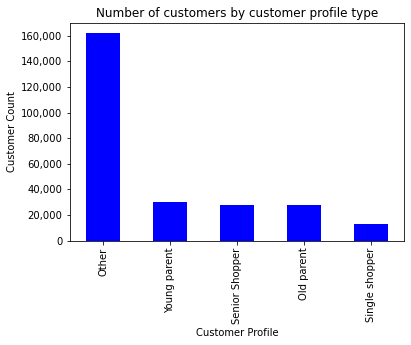

In [12]:
# bar chart based on distribution of customer profiles

profile_bar = unique_profiles.plot.bar(color =['blue'], title = 'Number of customers by customer profile type')

plt.xlabel('Customer Profile')
plt.ylabel('Customer Count')

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


In [24]:
# To export profile_bar image file

profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profile_bar.png'))

In [17]:
# Aggregate age range of Instacart users

agerange_cust = df_final.groupby('age_range').agg({'user_id': ['count']})

In [12]:
agerange_cust

,user_id
,count
age_range,
20 & under,1454728
21-30,4849512
31-40,4844193
41-50,4868632
51-60,4834892
61-70,4779958
71-80,4846802
81+,485847


/var/folders/hp/8pw7bj8j4cn95z6t9ph44m480000gn/T/ipykernel_2925/1152760705.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 3000000.0, '3,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 5000000.0, '5,000,000'),
 Text(0, 6000000.0, '6,000,000')]

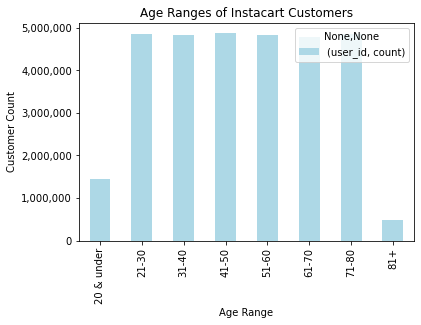

In [18]:
# bar chart based on distribution of customer profiles

bar_agerange_cust = agerange_cust.plot.bar(color =['lightblue'], title = 'Age Ranges of Instacart Customers')

plt.xlabel('Age Range')
plt.ylabel('Customer Count')

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [19]:
# To export bar_xcustomer_price_range

bar_agerange_cust.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_agerange_cust.png'), bbox_inches = 'tight')

# 5. Descriptive stats of customer profiles

In [12]:
# find the mean, min & max of usage frequency, grouped by customer_profile

usage_freq_stats = df_final.groupby('customer_profile').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [13]:
usage_freq_stats

days_since_prior_order           
                                   mean  min   max
customer_profile                                  
Old parent                     9.417114  0.0  30.0
Other                         11.000952  0.0  30.0
Senior Shopper                 9.374822  0.0  30.0
Single shopper                 9.424733  0.0  30.0
Young parent                   9.366208  0.0  30.0

In [15]:
# find the mean, min & max of the expenditure, grouped by customer_profile

prices_stats = df_final.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})

In [28]:
prices_stats

prices           
                      mean  min   max
customer_profile                     
Old parent        8.094157  1.0  20.0
Other             7.700594  1.0  25.0
Senior Shopper    7.656634  1.0  15.0
Single shopper    7.699366  1.0  15.0
Young parent      8.008409  1.0  20.0

# 6. Customer profile by region

In [30]:
# Crosstab customer_profile and region

xcustomer_region = pd.crosstab(df_final['customer_profile'], df_final['region'], dropna = False)

In [31]:
xcustomer_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Old parent,989030,743841,1357434,1047798
Other,3789235,2843025,5372549,4138500
Senior Shopper,986600,762516,1416691,1102933
Single shopper,485695,344228,684034,521345
Young parent,1010953,771075,1480431,1116651


# 7. Customer profile by price range

In [14]:
# Crosstab customer_profile and price_range_loc

xcustomer_price_range = pd.crosstab(df_final['customer_profile'], df_final['price_range_loc'], dropna = False)

In [34]:
xcustomer_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
customer_profile,,,
Old parent,375,1149839,2987889
Other,396743,5282534,10464032
Senior Shopper,351,1354497,2913892
Single shopper,297,638494,1396511
Young parent,187,1249476,3129447


/var/folders/hp/8pw7bj8j4cn95z6t9ph44m480000gn/T/ipykernel_1374/3584257027.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 8000000.0, '8,000,000'),
 Text(0, 10000000.0, '10,000,000'),
 Text(0, 12000000.0, '12,000,000')]

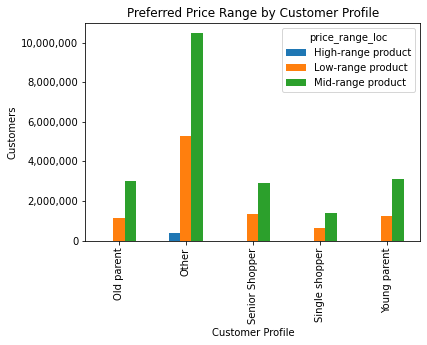

In [15]:
# Create bar chart for bar_xcustomer_price_range

bar_xcustomer_price_range = xcustomer_price_range.plot.bar(title = 'Preferred Price Range by Customer Profile')

plt.xlabel('Customer Profile')
plt.ylabel('Customers')

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


In [16]:
# To export bar_xcustomer_price_range

bar_xcustomer_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_xcustomer_price_range.png'), bbox_inches = 'tight')

# 8. Customer profile by spending type

In [11]:
# Crosstab customer_profile and spending_flag

xcustomer_spending = pd.crosstab(df_final['customer_profile'], df_final['spending_flag'], dropna = False)

In [45]:
xcustomer_spending

spending_flag,High spender,Low spender
customer_profile,,
Old parent,37740,4100363
Other,480518,15662791
Senior Shopper,39673,4229067
Single shopper,24879,2010423
Young parent,20615,4358495


/var/folders/hp/8pw7bj8j4cn95z6t9ph44m480000gn/T/ipykernel_1374/2503542513.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, -2000000.0, '-2,000,000'),
 Text(0, 0.0, '0'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 8000000.0, '8,000,000'),
 Text(0, 10000000.0, '10,000,000'),
 Text(0, 12000000.0, '12,000,000'),
 Text(0, 14000000.0, '14,000,000'),
 Text(0, 16000000.0, '16,000,000'),
 Text(0, 18000000.0, '18,000,000')]

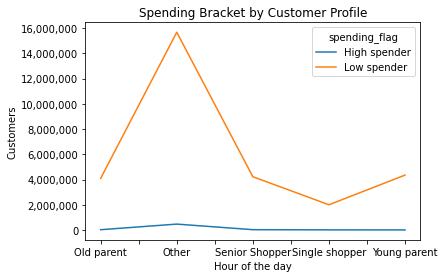

In [12]:
# Create line chart for line_xcustomer_spending

line_xcustomer_spending = xcustomer_spending.plot.line(title = 'Spending Bracket by Customer Profile')

plt.xlabel('Hour of the day')
plt.ylabel('Customers')

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


In [13]:
# To export line_xcustomer_spending

line_xcustomer_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','line_xcustomer_spending.png'), bbox_inches = 'tight')

# 9. Customer profile by loyalty

In [12]:
# Crosstab customer_profile and loyalty_flag

xcustomer_loyalty = pd.crosstab(df_final['customer_profile'], df_final['loyalty_flag'], dropna = False)

In [25]:
xcustomer_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
customer_profile,,,
Old parent,1504308,458225,2175570
Other,4883194,3175118,8084997
Senior Shopper,1567760,471788,2229192
Single shopper,742266,220147,1072889
Young parent,1586565,478417,2314128


/var/folders/hp/8pw7bj8j4cn95z6t9ph44m480000gn/T/ipykernel_1334/1269054033.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 3000000.0, '3,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 5000000.0, '5,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 7000000.0, '7,000,000'),
 Text(0, 8000000.0, '8,000,000'),
 Text(0, 9000000.0, '9,000,000')]

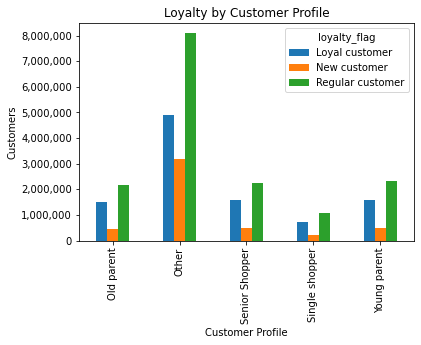

In [14]:
# Create bar chart for bar_xcustomer_loyalty

bar_xcustomer_loyalty = xcustomer_loyalty.plot.bar(title = 'Loyalty by Customer Profile')

plt.xlabel('Customer Profile')
plt.ylabel('Customers')

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [15]:
# To export bar_xcustomer_loyalty

bar_xcustomer_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_xcustomer_loyalty.png'), bbox_inches = 'tight')